In [1]:
# -------------------- Imports -------------------- #

from sklearn.multiclass import OutputCodeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, os
from prettytable import PrettyTable

In [2]:
# -------------------- Globals and Configs -------------------- #

feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('../data/csv/train.csv')
testing_input_file = os.path.abspath('../data/csv/test.csv')

np.random.seed(666)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [3]:
# -------------------- Data -------------------- #

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

# Initialise scaler to scale the data
scaler = StandardScaler()

train_set = np.empty(train_x.shape, dtype = float)
test_set = np.empty(test_x.shape, dtype = float)

# Make training data suitable for scaling
for index in range(len(train_x)):
    train_set[index] = train_x[index].astype(float)

# Make testing data suitable for scaling
for index in range(len(test_x)):
    test_set[index] = test_x[index].astype(float)

# Fit the training data
scaler.fit(train_set)  

# Scale the training and testing data w.r.t scaler
data_train = scaler.transform(train_set)
data_test = scaler.transform(test_set)

tab = PrettyTable(['Config', 'Value'])
configs = vars(config)

for key in configs:
    tab.add_row([key, configs[key]])
print(tab)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+
Instances in training data : 25010
Instances in testing data : 1000000


In [4]:
# -------------------- Model -------------------- #

occ = OutputCodeClassifier(BaggingClassifier())
occ.fit(data_train, train_y)
prediction = occ.predict(data_test)
accuracy = accuracy_score(test_y, prediction)

In [5]:
# -------------------- Print the final result -------------------- #

print("\nAccuracy using Output Code Classifier :", round(accuracy * 100, 3),"%\n")


Accuracy using Output Code Classifier : 61.326 %



Accuracy : 61.326


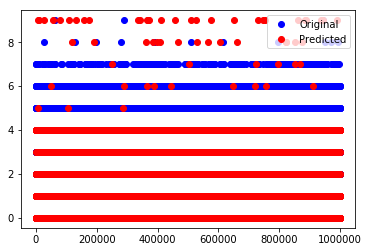

In [6]:
# -------------------- Visualisations -------------------- #

print("Accuracy :", round(accuracy * 100, 3))
plt.plot(test_y, 'bo', label = "Original")
plt.plot(prediction, 'ro', label = "Predicted")
plt.legend()
plt.show()